# Installations & Imports

In [2]:
# Numerical computing and data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Display settings
pd.set_option('display.max_colwidth', 180)
sns.set_style("whitegrid")

# Constants
SEED = 42

# Data Loading

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/Cadence2B/dashboard_data/

aspect_sentiments.csv  disagreements.csv
aspect_summary.csv     sample_reviews.csv


In [6]:
# Load ABSA results
aspects_df = pd.read_csv('/content/drive/MyDrive/Cadence2B/dashboard_data/aspect_sentiments.csv')
summary_df = pd.read_csv('/content/drive/MyDrive/Cadence2B/dashboard_data/aspect_summary.csv')

In [7]:
# Check if ratings exist
if 'rating' not in aspects_df.columns:
    print("(X) WARNING: No 'rating' column found in aspect_sentiments.csv")
    print("(X) Disagreement analysis requires rating data")
    print("(X) Skipping this notebook or add ratings to proceed\n")
    has_ratings = False
else:
    has_ratings = True
    print(f"Loaded {len(aspects_df):,} aspect-sentiment pairs with ratings")


Loaded 918,167 aspect-sentiment pairs with ratings


In [8]:
# Try to load disagreements file
try:
    disagreements_df = pd.read_csv('/content/drive/MyDrive/Cadence2B/dashboard_data/disagreements.csv')
    print(f"- Loaded {len(disagreements_df):,} disagreement cases")
    print(f"- Disagreement rate: {len(disagreements_df)/len(aspects_df)*100:.2f}%\n")
except FileNotFoundError:
    if has_ratings:
        print("(X) No disagreements.csv found - will generate from aspects_df\n")
        disagreements_df = None
    else:
        print("(X) No disagreements.csv found and no ratings available\n")
        disagreements_df = None

- Loaded 194,295 disagreement cases
- Disagreement rate: 21.16%



# Break down disagreement cases into categories

In [9]:
def categorize_disagreements(disagreements_df):
    '''
    Categorize disagreement cases into specific types.

    Parameters:
        disagreements_df: DataFrame containing disagreement cases

    Returns:
        dict: Counts for each disagreement type
    '''

    # High-rated but negative sentiment
    high_rated_negative = disagreements_df[
        (disagreements_df['rating'] >= 4) &
        (disagreements_df['sentiment'] == 'negative')
    ]

    # Low-rated but positive sentiment
    low_rated_positive = disagreements_df[
        (disagreements_df['rating'] <= 2) &
        (disagreements_df['sentiment'] == 'positive')
    ]

    # Extreme ratings but neutral sentiment
    extreme_rated_neutral = disagreements_df[
        ((disagreements_df['rating'] == 5) | (disagreements_df['rating'] == 1)) &
        (disagreements_df['sentiment'] == 'neutral')
    ]

    categories = {
        'high_rated_negative': high_rated_negative,
        'low_rated_positive': low_rated_positive,
        'extreme_rated_neutral': extreme_rated_neutral
    }

    return categories

In [10]:
# Categorize all disagreements
disagreement_categories = categorize_disagreements(disagreements_df)

In [11]:
print("=" * 80)
print("DISAGREEMENT BREAKDOWN")
print("=" * 80)

for category, df in disagreement_categories.items():
    print(f"\n{category.replace('_', ' ').title()}: {len(df):,} cases")

DISAGREEMENT BREAKDOWN

High Rated Negative: 43,005 cases

Low Rated Positive: 53,754 cases

Extreme Rated Neutral: 97,536 cases


# High Rated Negative Analysis

In [12]:
print("\n" + "=" * 80)
print("HIGH-RATED BUT NEGATIVE SENTIMENT ANALYSIS")
print("=" * 80)
print("(Customers gave 4-5 stars but mentioned negative aspects)")

high_rated_negative = disagreement_categories['high_rated_negative']

# Identify most common aspects in these cases
print(f"\nTotal cases: {len(high_rated_negative):,}")

aspect_counts = high_rated_negative['aspect'].value_counts().head(20)
print(f"\nTop 20 aspects mentioned negatively in high-rated reviews:")
for aspect, count in aspect_counts.items():
    percentage = (count / len(high_rated_negative)) * 100
    print(f"  {aspect:<30} {count:>6,} ({percentage:>5.1f}%)")

# Show examples
print(f"\n{'─' * 80}")
print("EXAMPLES: High-rated reviews with negative aspects")
print('─' * 80)

for i, (idx, row) in enumerate(high_rated_negative.sample(min(5, len(high_rated_negative)), random_state=SEED).iterrows(), 1):
    print(f"\n{i}. Rating: {row['rating']}★  |  Aspect: {row['aspect']}")
    print(f"   Review: {row['text'][:200]}...")


HIGH-RATED BUT NEGATIVE SENTIMENT ANALYSIS
(Customers gave 4-5 stars but mentioned negative aspects)

Total cases: 43,005

Top 20 aspects mentioned negatively in high-rated reviews:
  quality                           469 (  1.1%)
  sound                             352 (  0.8%)
  reviews                           351 (  0.8%)
  headphones                        335 (  0.8%)
  cables                            283 (  0.7%)
  batteries                         255 (  0.6%)
  part                              254 (  0.6%)
  videos                            250 (  0.6%)
  battery                           238 (  0.6%)
  screen                            237 (  0.6%)
  battery life                      228 (  0.5%)
  Battery life                      220 (  0.5%)
  Bluetooth                         213 (  0.5%)
  USB                               206 (  0.5%)
  software                          197 (  0.5%)
  camera                            193 (  0.4%)
  sound quality                  

# Low Rated Positive Analysis

In [13]:
print("\n" + "=" * 80)
print("LOW-RATED BUT POSITIVE SENTIMENT ANALYSIS")
print("=" * 80)
print("(Customers gave 1-2 stars but mentioned positive aspects)")

low_rated_positive = disagreement_categories['low_rated_positive']

print(f"\nTotal cases: {len(low_rated_positive):,}")

aspect_counts = low_rated_positive['aspect'].value_counts().head(20)
print(f"\nTop 20 aspects mentioned positively in low-rated reviews:")
for aspect, count in aspect_counts.items():
    percentage = (count / len(low_rated_positive)) * 100
    print(f"  {aspect:<30} {count:>6,} ({percentage:>5.1f}%)")

# Show examples
print(f"\n{'─' * 80}")
print("EXAMPLES: Low-rated reviews with positive aspects")
print('─' * 80)

for i, (idx, row) in enumerate(low_rated_positive.sample(min(5, len(low_rated_positive)), random_state=SEED).iterrows(), 1):
    print(f"\n{i}. Rating: {row['rating']}★  |  Aspect: {row['aspect']}")
    print(f"   Review: {row['text'][:200]}...")


LOW-RATED BUT POSITIVE SENTIMENT ANALYSIS
(Customers gave 1-2 stars but mentioned positive aspects)

Total cases: 53,754

Top 20 aspects mentioned positively in low-rated reviews:
  sound                             841 (  1.6%)
  quality                           711 (  1.3%)
  these headphones                  654 (  1.2%)
  headphones                        471 (  0.9%)
  Sound quality                     451 (  0.8%)
  reviews                           437 (  0.8%)
  Sound                             392 (  0.7%)
  good quality                      376 (  0.7%)
  camera                            319 (  0.6%)
  videos                            314 (  0.6%)
  Picture quality                   288 (  0.5%)
  Bluetooth                         270 (  0.5%)
  features                          263 (  0.5%)
  these cameras                     253 (  0.5%)
  sound quality                     249 (  0.5%)
  better quality                    234 (  0.4%)
  battery life                     

# Disagreement Distribution Plot

In [14]:
def plot_disagreement_distribution(disagreement_categories):
    '''
    Visualize the distribution of disagreement types.

    Parameters:
        disagreement_categories: Dict of disagreement DataFrames
    '''

    categories = []
    counts = []
    colors = []

    for cat_name, df in disagreement_categories.items():
        categories.append(cat_name.replace('_', ' ').title())
        counts.append(len(df))

        # Assign colors
        if 'negative' in cat_name:
            colors.append('#e74c3c')
        elif 'positive' in cat_name:
            colors.append('#2ecc71')
        else:
            colors.append('#95a5a6')

    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=colors)
    plt.xlabel('Disagreement Type', fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.title('Distribution of Disagreement Types', fontsize=14, fontweight='bold')
    plt.xticks(rotation=15, ha='right')

    # Add count labels
    for i, count in enumerate(counts):
        plt.text(i, count + max(counts)*0.02, f'{count:,}', ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

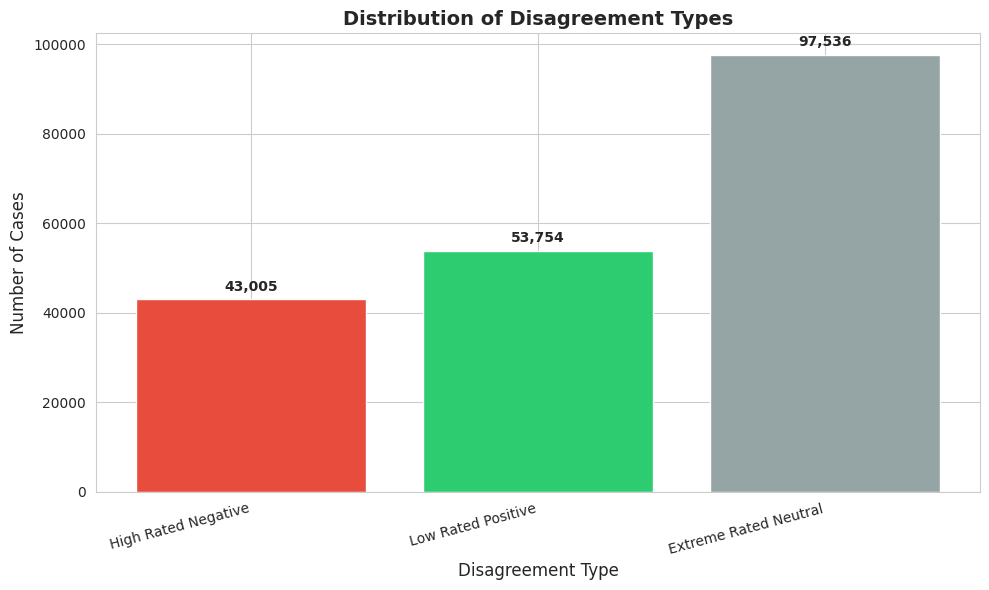

In [15]:
plot_disagreement_distribution(disagreement_categories)

# Regular Aspects vs. Disagreement Cases

In [16]:
def compare_aspect_sentiment(aspect_name, aspects_df, disagreements_df):
    '''
    Compare sentiment distribution for an aspect in regular vs disagreement cases.

    Parameters:
        aspect_name: Name of aspect to analyze
        aspects_df: All aspect-sentiment pairs
        disagreements_df: Disagreement cases only
    '''

    # Get aspect data
    regular = aspects_df[aspects_df['aspect'] == aspect_name]
    disagreement = disagreements_df[disagreements_df['aspect'] == aspect_name]

    if len(regular) == 0:
        print(f"No data for aspect: {aspect_name}")
        return

    print(f"\n{'=' * 80}")
    print(f"COMPARISON: {aspect_name.upper()}")
    print('=' * 80)

    print(f"\nRegular cases:      {len(regular):>6,}")
    print(f"Disagreement cases: {len(disagreement):>6,}")

    if len(regular) > 0:
        print(f"Disagreement rate:  {len(disagreement)/len(regular)*100:>6.1f}%")

    # Sentiment comparison
    print(f"\nSentiment Distribution:")
    print(f"                 Positive    Neutral    Negative")

    for label, data in [('Regular', regular), ('Disagreement', disagreement)]:
        sent_counts = data['sentiment'].value_counts()
        total = len(data)

        pos_pct = (sent_counts.get('positive', 0) / total * 100) if total > 0 else 0
        neu_pct = (sent_counts.get('neutral', 0) / total * 100) if total > 0 else 0
        neg_pct = (sent_counts.get('negative', 0) / total * 100) if total > 0 else 0

        print(f"  {label:<14} {pos_pct:>6.1f}%  {neu_pct:>8.1f}%  {neg_pct:>9.1f}%")

In [17]:
# Compare top aspects
print("\n" + "=" * 80)
print("ASPECT SENTIMENT: Regular vs Disagreement Cases")
print("=" * 80)

top_aspects = summary_df.head(10)['aspect'].tolist()

for aspect in top_aspects[:5]:  # Analyze top 5
    compare_aspect_sentiment(aspect, aspects_df, disagreements_df)


ASPECT SENTIMENT: Regular vs Disagreement Cases

COMPARISON: SOUND

Regular cases:       9,259
Disagreement cases:  1,747
Disagreement rate:    18.9%

Sentiment Distribution:
                 Positive    Neutral    Negative
  Regular          42.3%      23.8%       33.9%
  Disagreement     48.1%      31.7%       20.1%

COMPARISON: QUALITY

Regular cases:       9,086
Disagreement cases:  1,591
Disagreement rate:    17.5%

Sentiment Distribution:
                 Positive    Neutral    Negative
  Regular          50.6%      16.0%       33.3%
  Disagreement     44.7%      25.8%       29.5%

COMPARISON: HEADPHONES

Regular cases:       6,716
Disagreement cases:  1,385
Disagreement rate:    20.6%

Sentiment Distribution:
                 Positive    Neutral    Negative
  Regular          37.8%      38.8%       23.4%
  Disagreement     34.0%      41.8%       24.2%

COMPARISON: CAMERA

Regular cases:       6,712
Disagreement cases:  1,310
Disagreement rate:    19.5%

Sentiment Distribution:


# Identify actionable patterns in disagreement cases

In [18]:
def generate_disagreement_insights(disagreements_df, aspects_df):
    '''
    Generate business insights from disagreement patterns.

    Parameters:
        disagreements_df: Disagreement cases
        aspects_df: All aspect-sentiment pairs

    Returns:
        dict: Structured business insights
    '''

    insights = {}

    # 1. Hidden problems (high-rated negative)
    high_neg = disagreements_df[
        (disagreements_df['rating'] >= 4) &
        (disagreements_df['sentiment'] == 'negative')
    ]

    hidden_problems = high_neg['aspect'].value_counts().head(10)
    insights['hidden_problems'] = hidden_problems.to_dict()

    # 2. Redeeming qualities (low-rated positive)
    low_pos = disagreements_df[
        (disagreements_df['rating'] <= 2) &
        (disagreements_df['sentiment'] == 'positive')
    ]

    redeeming_qualities = low_pos['aspect'].value_counts().head(10)
    insights['redeeming_qualities'] = redeeming_qualities.to_dict()

    # 3. Most controversial aspects (highest disagreement rates)
    disagreement_rates = {}

    for aspect in aspects_df['aspect'].unique():
        total = len(aspects_df[aspects_df['aspect'] == aspect])
        disagreements = len(disagreements_df[disagreements_df['aspect'] == aspect])

        if total >= 100:  # Only consider aspects with 100+ mentions
            rate = disagreements / total
            disagreement_rates[aspect] = {'rate': rate, 'total': total, 'disagreements': disagreements}

    # Sort by disagreement rate
    controversial = sorted(disagreement_rates.items(),
                          key=lambda x: x[1]['rate'],
                          reverse=True)[:10]

    insights['controversial_aspects'] = {
        aspect: data for aspect, data in controversial
    }

    return insights

In [ ]:
insights = generate_disagreement_insights(disagreements_df, aspects_df)


In [ ]:
# Display insights
print("\n" + "=" * 80)
print("BUSINESS INSIGHTS FROM DISAGREEMENT ANALYSIS")
print("=" * 80)

print("\n1. HIDDEN PROBLEMS (mentioned negatively in high-rated reviews):")
print("   → These aspects don't ruin the product but cause frustration")
for aspect, count in list(insights['hidden_problems'].items())[:10]:
    print(f"   • {aspect}: {count:,} cases")

print("\n2. REDEEMING QUALITIES (mentioned positively in low-rated reviews):")
print("   → These aspects are strengths despite overall dissatisfaction")
for aspect, count in list(insights['redeeming_qualities'].items())[:10]:
    print(f"   • {aspect}: {count:,} cases")

print("\n3. MOST CONTROVERSIAL ASPECTS (highest disagreement rates):")
print("   → These aspects have inconsistent customer experiences")
for aspect, data in insights['controversial_aspects']:
    rate = data['rate'] * 100
    print(f"   • {aspect}: {rate:.1f}% disagreement rate ({data['disagreements']:,}/{data['total']:,})")


In [ ]:
# Export Insights

# Save insights as JSON
import json

output_file = 'data/disagreement_insights.json'

with open(output_file, 'w') as f:
    # Convert to JSON-serializable format
    export_data = {
        'hidden_problems': insights['hidden_problems'],
        'redeeming_qualities': insights['redeeming_qualities'],
        'controversial_aspects': {
            aspect: {
                'disagreement_rate': data['rate'],
                'total_mentions': data['total'],
                'disagreement_count': data['disagreements']
            }
            for aspect, data in insights['controversial_aspects']
        }
    }

    json.dump(export_data, f, indent=2)

In [ ]:
print(f"\nInsights saved to {output_file}")
print("- Disagreement analysis complete!")
print("- Use these insights to build recommendation logic in the dashboard")